---

Applied Statistics

# Worksheet: Railway Field Laboratory 2 – Initial Model

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. We are now ready to fit our initial model, using exclusively the data measured prior to the installation of the new rail pads.
#### a) Filter the data according to the following criteria:
* MQ 2.1
* 3.0m microphone
* `date` < "2023-05-18" 
* `zugtyp` IC2000

In [2]:
data_raw = pd.read_pickle("railway.pkl")

# MQ2.1 and 3.0m-micro and zugtyp IC2000 only
data1 = data_raw.query('location_name == "MQ21" and sensor_position == "3.0m" and zugtyp=="IC2000" and date < "2023-05-18"').copy()
data1.head()

,passby_id,location_name,sensor_position,tel80,tel,speed,starttime,date,zugtyp,zw
train_id,,,,,,,,,,
18039,16826,MQ21,3.0m,74.172090,83.16478,119.68660,2022-11-02 16:12:02.565000+01:00,2022-11-02,IC2000,alte_zw
166909,167083,MQ21,3.0m,74.737080,83.44266,117.05235,2022-10-27 18:23:36.311000+02:00,2022-10-27,IC2000,alte_zw
300254,299913,MQ21,3.0m,75.903390,84.87291,119.42399,2023-05-09 16:12:14.979000+02:00,2023-05-09,IC2000,alte_zw
300286,299668,MQ21,3.0m,75.715065,84.75127,119.99194,2023-05-09 08:42:00.954000+02:00,2023-05-09,IC2000,alte_zw
166732,166261,MQ21,3.0m,74.537010,83.53315,119.71798,2022-10-27 08:42:06.280000+02:00,2022-10-27,IC2000,alte_zw


#### b) Fit a model with TEL as the explained variable and speed as the explanatory variable.

In [3]:
m1 = smf.ols(formula="tel ~ speed", data=data1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tel   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     178.5
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           2.20e-37
Time:                        13:15:52   Log-Likelihood:                -1384.9
No. Observations:                 934   AIC:                             2774.
Df Residuals:                     932   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.9651      0.829     87.981      0.000      71.337      74.593
speed          0.0933      0.007     13.362      0.000       0.080       0.107
==============================================================================
Omnibus:                      746.734   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42288.842
Skew:                           3.159   Prob(JB):                         0.00
Kurtosis:                      35.353   Cond. No.                     2.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c) Create a regression plot for this model. What do you notice?

<Axes: xlabel='speed', ylabel='tel'>

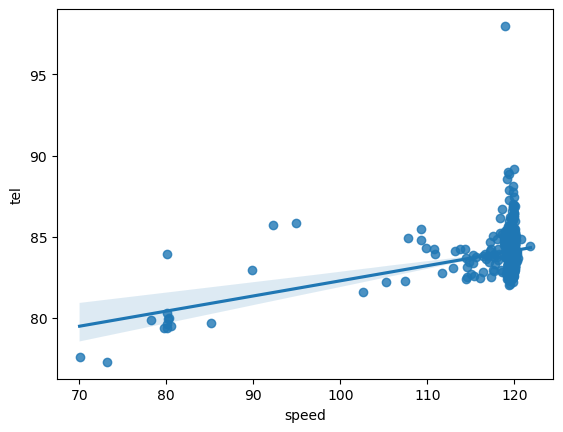

In [4]:
sns.regplot(y="tel", x="speed", data=data1)

* Most of the observations have a speed close to 120 km/h.
* The few observations with low velocity have a very large influence on the regression line. This is referred to as a leverage effect.

#### d) Use a QQ plot and a residuals vs. fits plot to check whether the requirements for the model are met.

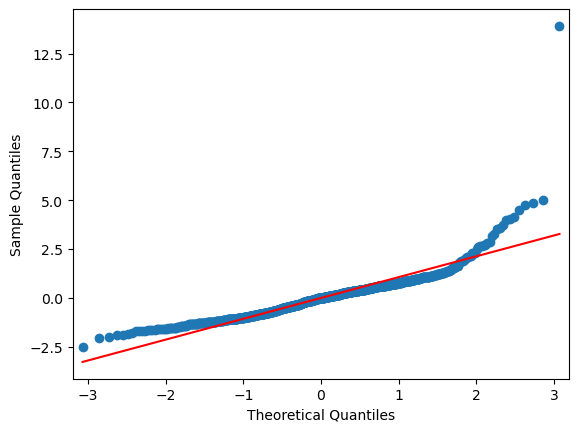

In [5]:
sm.qqplot(m1.resid,line='s')
None

* The distribution of the residuals is not normal, but right-skewed.
* While this is not ideal, the large sample size mitigates potential issues.

<Axes: xlabel='None', ylabel='None'>

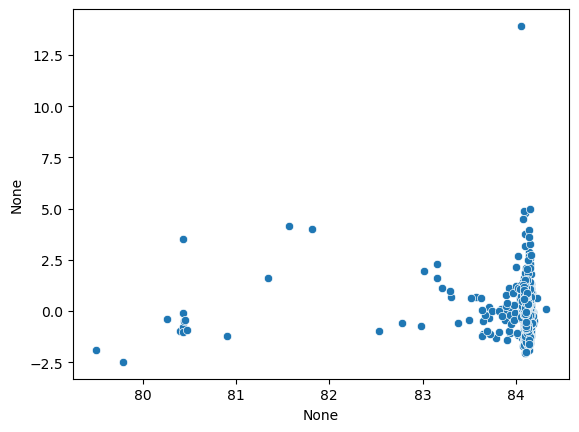

In [6]:
sns.scatterplot(x=m1.fittedvalues, y=m1.resid)

* One outlier stands out.
* The skewed distribution of the residuals is clearly visible.

### 2. The definition of TEL80 assumes a linear relationship between TEL and $\lg \left(\frac{v}{80}\right)$:

$TEL80$ is defined as 
$$
    TEL80 = TEL - 30 \cdot \lg \left(\frac{v}{80}\right)
$$
where $v$ denotes the speed.
So
$$
    TEL = a + b \lg\left(\frac{v}{80}\right)
$$
with $a = TEL80$  and $b=30$.


#### a) Use the data from the previous task and transform the variable speed according to the above equation.

In [7]:
data1['lg_speed_80'] = np.log10(data1.speed / 80)

#### b) Fit a model with TEL as the explained variable and the transformed speed as the explanatory variable.

In [8]:
m2 = smf.ols(formula="tel ~ lg_speed_80", data=data1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tel   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     185.3
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           1.29e-38
Time:                        13:15:53   Log-Likelihood:                -1382.1
No. Observations:                 934   AIC:                             2768.
Df Residuals:                     932   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      80.3468      0.273    294.004      0.000      79.810      80.883
lg_speed_80    21.5887      1.586     13.612      0.000      18.476      24.701
==============================================================================
Omnibus:                      750.572   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43078.316
Skew:                           3.180   Prob(JB):                         0.00
Kurtosis:                      35.657   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c) Does the estimated value for $b$ align with the definition of TEL80?
* How can the estimation of $b$ be improved?
* What adjustments are needed in the measurement procedure?

* The estimated value for $b$ is 21.6 instead of 30.
* The estimate is very imprecise because most of the observations are close to 120 km/h.
* In order to obtain a better estimate, the speeds of the trains would have to be distributed more evenly over the area of interest. However, this is not realistic during operational train service.

#### d) Create a regression plot for this model. What do you notice?

<Axes: xlabel='lg_speed_80', ylabel='tel'>

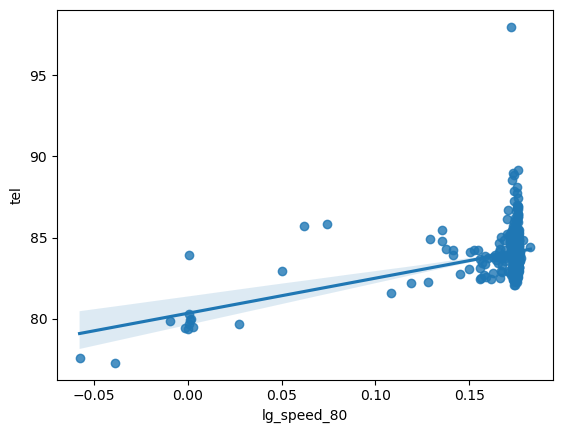

In [9]:
sns.regplot(y="tel", x="lg_speed_80", data=data1)

#### e) Use a QQ plot and a residuals vs. fits plot to check whether the requirements for the model are met.

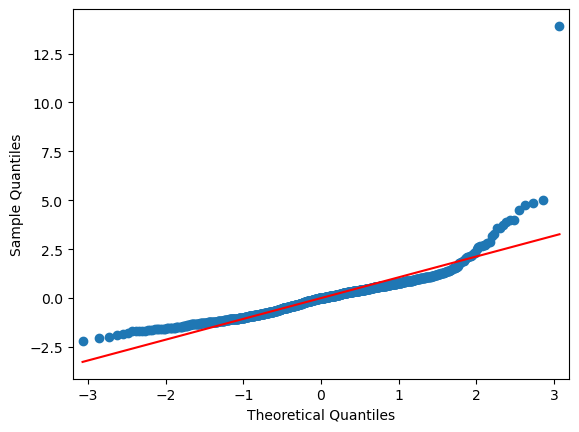

In [10]:
sm.qqplot(m2.resid,line='s')
None

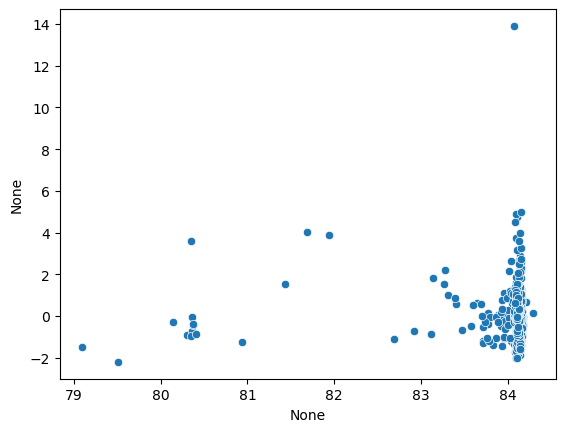

In [11]:
sns.scatterplot(x=m2.fittedvalues, y=m2.resid)
None